# Simulations for colored noise
GitHub project: **https://github.com/Fertmeneses/qubit-noise-spectroscopy**

Author: **Fernando Meneses**.

In [8]:
# Import libraries:
import numpy as np
import matplotlib.pyplot as plt
from random import random
from scipy.signal.windows import hann
from scipy.signal import welch

# General functions:
def build_color_noise_PSD(
    f_color,Df,dt=1e-8,N=1e6,Q=5e-4
    ):
    """
    {Q} [Float or Integer]: Scalig constant used in randomization
    """
    # Noise generation:
    N = int(N) # Convert to integer, just in case
    a = 2*0.15/Df # Correlation time [s]
    var = Q/(2*a)*(1-np.exp(-2*dt/a)) # Half-width for gaussian distributions [Hz]
    C = np.exp(-dt/a) # Correlation factor
    t_vec = np.arange(N)*dt # Time vector [s]
    color_noise = np.zeros(N) # Initiate vector
    color_noise[0] = var*random() # Set initial value
    unc_noise = np.random.normal(0, var, N) # Uncorrelated noise
    # Define values recursively:
    for i in range(N-1):
        color_noise[i+1] = color_noise[i]*C + unc_noise[i]
    # Shift the power spectrum to the color frequency:
    color_noise = np.multiply( # Element-wise multiplication
        np.cos(2*np.pi*f_color*t_vec),color_noise)
    color_noise /= np.max(np.abs(color_noise))

    # Calculate power spectral density (PSD), using Welch's method:
    N_wdw = int(N*0.1) # Number of points for a single window
    freq_vec, PSD_vec = welch(color_noise,fs=fs,nperseg=N_wdw) # Frequency [Hz] and PSD [arb. units]

    return t_vec, color_noise, freq_vec, PSD_vec

def plot_noise_PSD(
    t_vec,noise_vec,freq_vec,PSD_vec,t_lims=None,noise_lims=None,
    f_lims=None,PSD_lims=None,color='teal',figsize=(8,4),
    save_name=None,save_format='png'
    ):
    """
    Xxx
    """
    # Prepare figure:
    fig, (ax_noise,ax_PSD) = plt.subplots(1,2,figsize=figsize)
    # Plot Noise Signal vs. Time:
    ax_noise.plot(t_vec,noise_vec,'-',color=color)
    if t_lims is not None:
        ax_noise.set_xlim(t_lims)
    if noise_lims is not None:
        ax_noise.set_ylim(noise_lims)
    # Plot Power Spectral Density vs. Frequency:
    ax_PSD.plot(freq_vec,PSD_vec,'-o',markersize=3,color=color)
    ax_PSD.set_xscale('log'), ax_PSD.set_yscale('log')
    if f_lims is not None:
        ax_PSD.set_xlim(f_lims)
    if PSD_lims is not None:
        ax_PSD.set_ylim(PSD_lims)
    fig.tight_layout()
    if save_name:
        if save_format == 'svg':
            plt.savefig(f'{save_name}.svg',format="svg",transparent=True) 
        else:
            plt.savefig(f'{save_name}.{save_format}') 

## Generate a spectral density distribution for a colored noise:

In [38]:
# General parameters related to time-domain:
dt = 1e-8 # Time resolution [s]
fs = 1/dt # Sampling rate [Hz]
N_t = 1e6 # Number of points for the time vector

# Parameters related to different colored-noise:
f0_1, f0_2, f0_3 = 12e3, 25e3, 50e3 # Color frequency [Hz] 
Df_1, Df_2, Df_3 = 2e3, 12e3, 60e3 # Color bandwidth [Hz]

# Generate colored-noise and Power Spectral Density (PSD):
t_vec_1, n_vec_1, f_vec_1, PSD_vec_1 = build_color_noise_PSD(
    f0_1,Df_1,dt=dt,N=N_t)
t_vec_2, n_vec_2, f_vec_2, PSD_vec_2 = build_color_noise_PSD(
    f0_2,Df_2,dt=dt,N=N_t)
t_vec_3, n_vec_3, f_vec_3, PSD_vec_3 = build_color_noise_PSD(
    f0_3,Df_3,dt=dt,N=N_t)

# Plot noise signal vs. time and PSD vs frequency:
figsize = (12,4)
color = ['teal','orange','green']
t_lims = [0,0.002] # [s]
noise_lims = None
f_lims = [1e3,2e6] # [Hz]
PSD_lims = [5e-12,4e-5] 
save_name = None

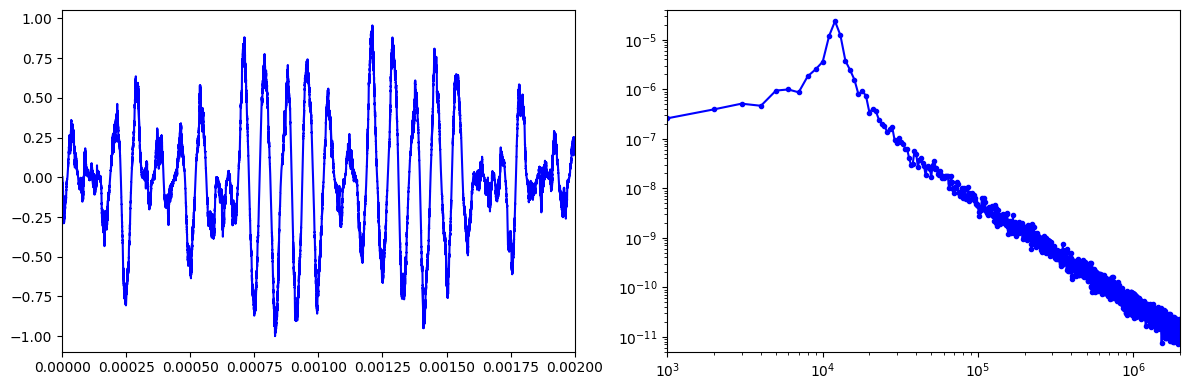

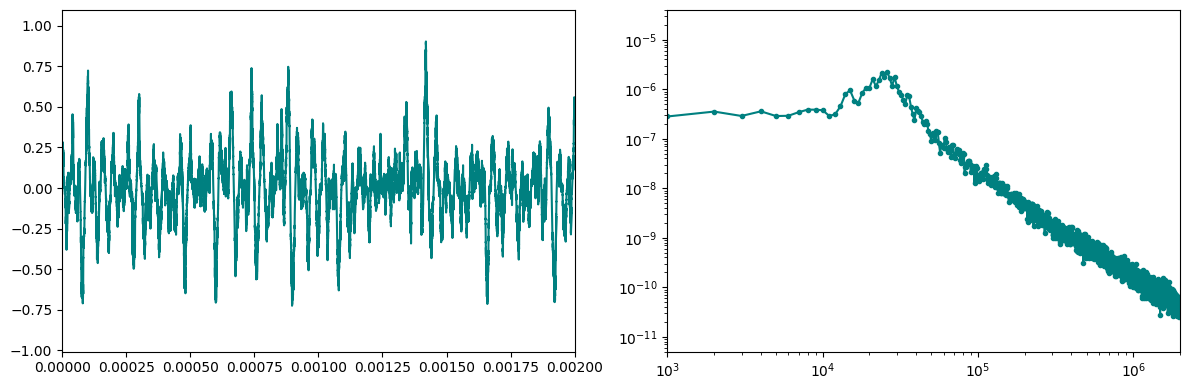

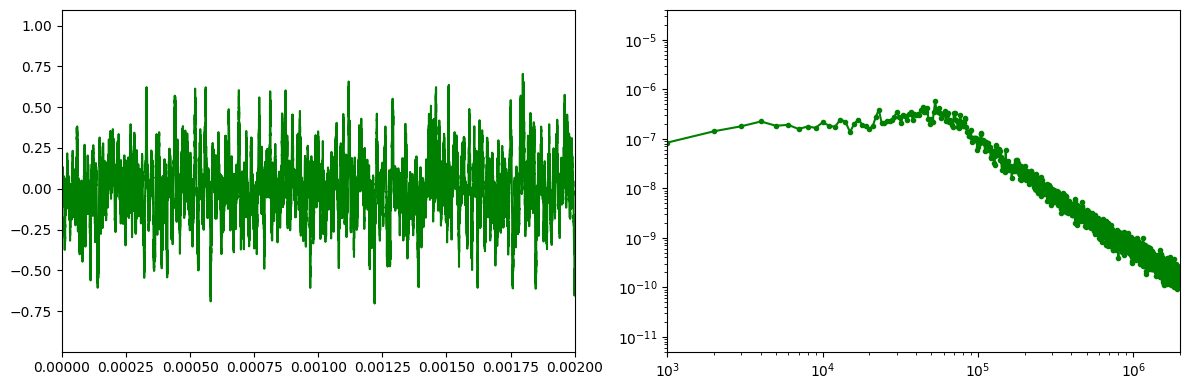

In [39]:
for _,(f0,Df,t,n,f,PSD,color) in enumerate(
    zip([f0_1, f0_2, f0_3], [Df_1, Df_2, Df_3],
        [t_vec_1,t_vec_2,t_vec_3], [n_vec_1,n_vec_2,n_vec_3],
        [f_vec_1,f_vec_2,f_vec_3], [PSD_vec_1,PSD_vec_2,PSD_vec_3],
        ['blue','teal','green'])):
    plot_noise_PSD(
        t,n,f,PSD,t_lims=t_lims,noise_lims=noise_lims,
        f_lims=f_lims,PSD_lims=PSD_lims,color=color,figsize=figsize,
        save_name=f'Noise_PSD_f{int(f0*1e-3)}kHz_Df{int(Df*1e-3)}kHz',save_format='svg'
        )